In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from efficientnet_pytorch import EfficientNet
from torchvision.models import efficientnet_b4

In [2]:
# class ResNet18(nn.Module):
#     def __init__(self, num_classes=16, pretrained=False):
#         super(ResNet18, self).__init__()
#         self.model = models.resnet18(pretrained=pretrained)
#         self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
#         self.model.conv1.weight.requires_grad = False  # Freezing the first layer weights

#     def forward(self, x):
#         return self.model(x)
# class ResNet50(nn.Module):
#             def __init__(self, num_classes=16, pretrained=False):
#                 super(ResNet50, self).__init__()
#                 self.model = models.resnet50(pretrained=pretrained)
#                 self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
#                 self.model.conv1.weight.requires_grad = False

#             def forward(self, x):
#                 return self.model(x)
# class ResNet34(nn.Module):
#             def __init__(self, num_classes=16, pretrained=False):
#                 super(ResNet34, self).__init__()
#                 self.model = models.resnet34(pretrained=pretrained)
#                 self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
#                 self.model.conv1.weight.requires_grad = False

#             def forward(self, x):
#                 return self.model(x)
# class EfficientNetB0(nn.Module):
#             def __init__(self, num_classes, pretrained=False):
#                 super(EfficientNetB0, self).__init__()
#                 self.model = EfficientNet.from_pretrained('efficientnet-b0') if pretrained else EfficientNet.from_name('efficientnet-b0')
#                 self.model._fc = nn.Linear(self.model._fc.in_features, num_classes)

#             def forward(self, x):
#                 return self.model(x)
# class NvidiaEfficientNetB4(nn.Module):
#             def __init__(self, num_classes, pretrained=False):
#                 super(NvidiaEfficientNetB4, self).__init__()
#                 self.model = efficientnet_b4(weights='IMAGENET1K_V1' if pretrained else None)
#                 self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, num_classes)

#             def forward(self, x):
#                 return self.model(x)
class VGG16(nn.Module):
            def __init__(self, num_classes, pretrained=False):
                super(VGG16, self).__init__()
                self.model = models.vgg16(pretrained=pretrained)
                
                self.model.features[0].weight.requires_grad = False
                self.model.features[0].bias.requires_grad = False
                in_features = self.model.classifier[-1].in_features 
                self.model.classifier[-1] = nn.Linear(in_features, num_classes)

            def forward(self, x):
                return self.model(x)

In [3]:
num_classes = 16  # Adjust based on your use case
model = VGG16(num_classes=num_classes, pretrained=False)

/home/bipp/BIPP/nCount/Bark Models/Barkdata-cnn-models/.bark/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bipp/BIPP/nCount/Bark Models/Barkdata-cnn-models/.bark/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [4]:
pretrained_dict  = torch.load('../trained_models/prod/VGG16/VGG16.pth')
model_dict = model.state_dict()
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and "fc" not in k}

/tmp/ipykernel_9846/2486704761.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict  = torch.load('../trained_models/prod/VGG16/VGG16.pth')


In [ ]:
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)

In [188]:
from torch.utils.data import DataLoader, random_split
import torch.optim as optim

In [189]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
     transforms.RandomHorizontalFlip(),
])

full_dataset = datasets.ImageFolder(root='../CHR', transform=transform)
train_ratio = 0.8
val_ratio = 0.2
batch_size = 64
learning_rate=0.0001
weight_decay=0.0001
train_size = int(train_ratio * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device info : " ,device)
model.to(device)


device info :  cuda


VGG16(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): Ma

In [190]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


def validate_model(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc, all_preds, all_labels


In [191]:
def start_training(num_epochs): 
    for epoch in range(num_epochs):
        print(f" started the epoch {epoch+1}/{num_epochs}")
        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_preds, val_labels = validate_model(model, val_loader, criterion, device)
        
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")
        # print(f"{val_labels,val_preds}")


start_training(100)

 started the epoch 1/100
Epoch 1/100
Train Loss: 1.2172, Train Accuracy: 0.6574
Val Loss: 0.3856, Val Accuracy: 0.8938
 started the epoch 2/100
Epoch 2/100
Train Loss: 0.3233, Train Accuracy: 0.9027
Val Loss: 0.2667, Val Accuracy: 0.9141
 started the epoch 3/100
Epoch 3/100
Train Loss: 0.1895, Train Accuracy: 0.9500
Val Loss: 0.2521, Val Accuracy: 0.9250
 started the epoch 4/100
Epoch 4/100
Train Loss: 0.1143, Train Accuracy: 0.9660
Val Loss: 0.2835, Val Accuracy: 0.9125
 started the epoch 5/100
Epoch 5/100
Train Loss: 0.0741, Train Accuracy: 0.9789
Val Loss: 0.3214, Val Accuracy: 0.9031
 started the epoch 6/100
Epoch 6/100
Train Loss: 0.0608, Train Accuracy: 0.9809
Val Loss: 0.2894, Val Accuracy: 0.9187
 started the epoch 7/100
Epoch 7/100
Train Loss: 0.0447, Train Accuracy: 0.9863
Val Loss: 0.3403, Val Accuracy: 0.9016
 started the epoch 8/100
Epoch 8/100
Train Loss: 0.0473, Train Accuracy: 0.9879
Val Loss: 0.3924, Val Accuracy: 0.9062
 started the epoch 9/100
Epoch 9/100
Train Loss:

KeyboardInterrupt: 

In [153]:
torch.save(model.state_dict(), '../Barknet Trained Models/VGG16/VGG16.pth')

In [154]:
model.eval()

NvidiaEfficientNetB4(
  (model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
              (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
             

In [155]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
])


def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  
    image = transform(image) 
    image = image.unsqueeze(0) 
    return image.to(device)

In [156]:
import os
from PIL import Image

In [ ]:
false_predictions = []
true_counts=0
test_class=0
for image in os.listdir(f'../test-data/{test_class}/'): 
    image_path = f'../test-data/{test_class}/' + image
    image = preprocess_image(image_path)
    with torch.no_grad():
        outputs = model(image)
        _, predicted = outputs.max(1)
        # print(outputs)
        predicted_label = predicted.item()
        if predicted_label == test_class :
            true_counts+=1
        else :
            false_predictions.append(predicted_label)
print('Total  : ', true_counts+ len(false_predictions), 'True Predictions:', true_counts, 'False Predictions: ', len(false_predictions), 'False Predictions : ', false_predictions)

Total  :  100 True Predictions: 88 False Predictions:  12 False Predictions :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [159]:
val_loss, val_acc, val_preds, val_labels = validate_model(model, val_loader, criterion, device)

Text(0.5, 1.0, 'Confusion Matrix')

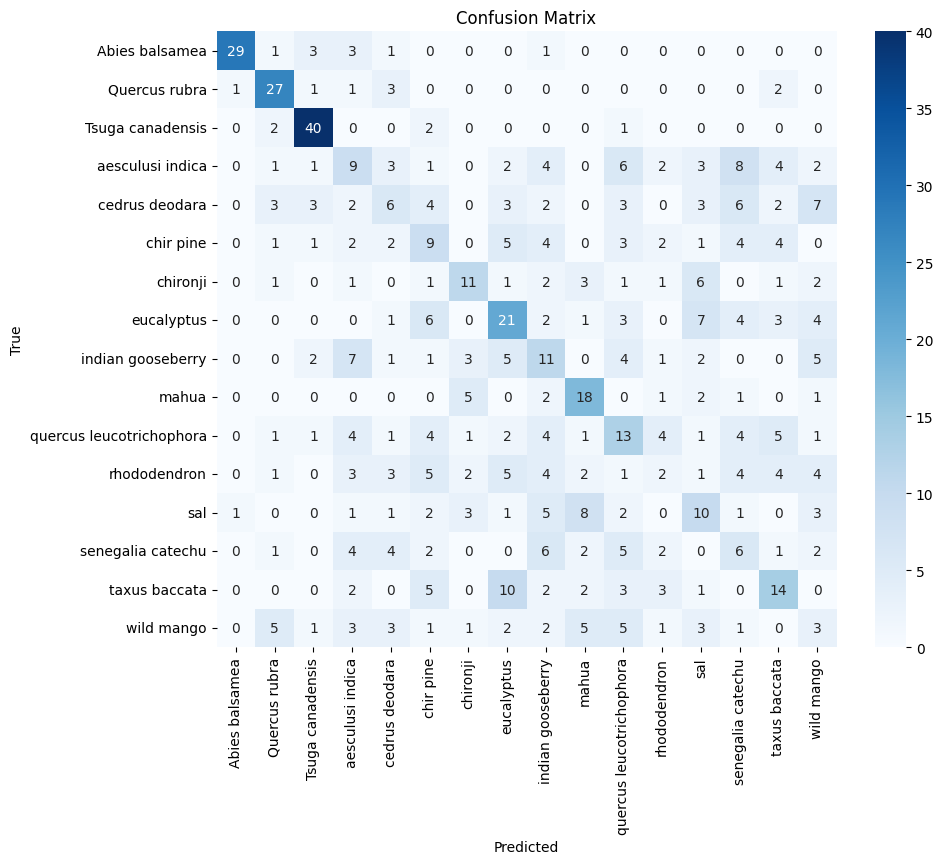

In [ ]:
conf_matrix = confusion_matrix(val_labels, val_preds)
class_names = full_dataset.classes 

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')